### **Vygenerujte sloupcový graf, který ukazuje celkové celosvětové prodeje nejprodávanějších her rozdělené podle žánru pro 4 platformy**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


In [8]:
df = pd.read_csv('vgsales.csv')
print(df.head(8))

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                    Tetris       GB  1989.0        Puzzle  Nintendo   
6     7     New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                  Wii Play      Wii  2006.0          Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         

In [9]:
top_platforms = (
    df.groupby('Platform')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(4)
    .index
)

In [13]:
filtered_data = df[df['Platform'].isin(top_platforms)]

In [14]:
sales_by_genre = (
    filtered_data.groupby(['Platform', 'Genre'])['Global_Sales']
    .sum()
    .reset_index()
)

In [20]:
colors = ['#003f5c', '#ffa600', '#7a5195', '#ef5675']
colors_palette = sns.set_palette(sns.color_palette(colors))

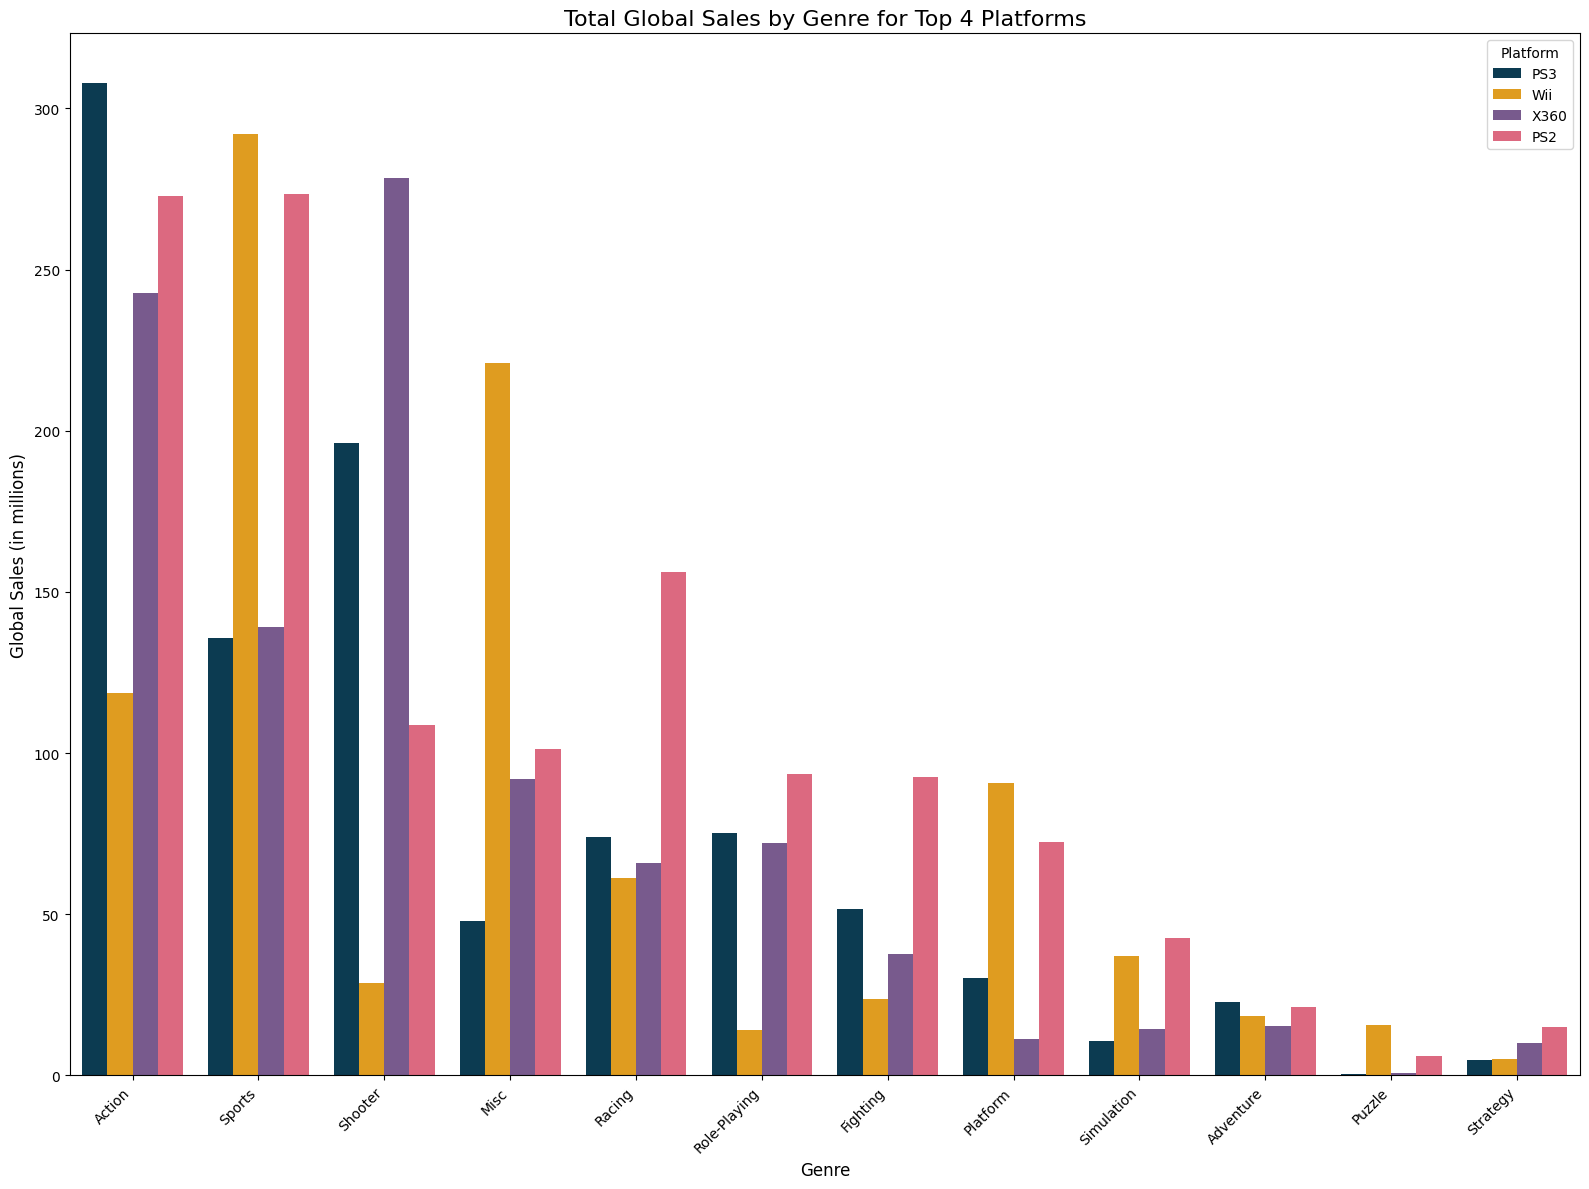

In [21]:
sales_by_genre_sorted = sales_by_genre.sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(16, 12))
sns.barplot(
    data=sales_by_genre_sorted,
    x='Genre',
    y='Global_Sales',
    hue='Platform',
    dodge=True, palette=colors_palette
)

plt.title('Total Global Sales by Genre for Top 4 Platforms', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', fontsize=10)
plt.tight_layout()
plt.show()

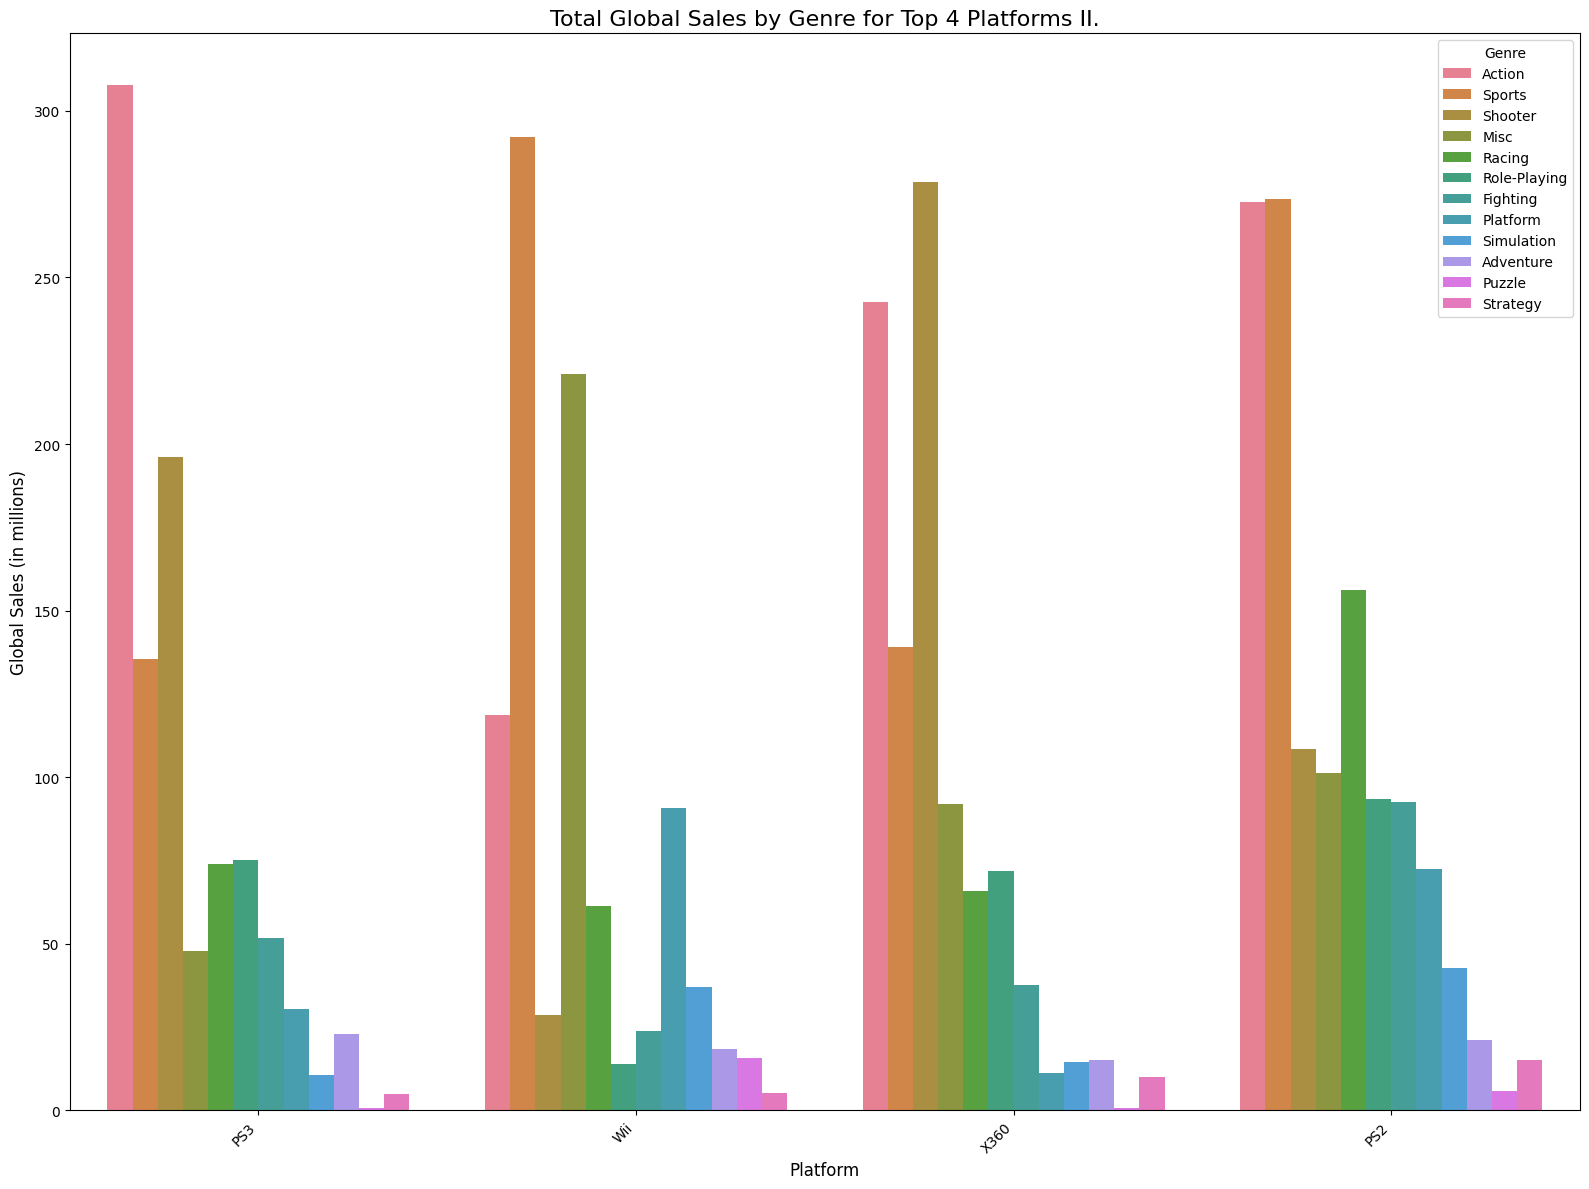

In [23]:
sales_by_genre_sorted = sales_by_genre.sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(16, 12))
sns.barplot(
    data=sales_by_genre_sorted,
    x='Platform',
    y='Global_Sales',
    hue='Genre',
    dodge=True, palette=colors_palette
)

plt.title('Total Global Sales by Genre for Top 4 Platforms II.', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre', fontsize=10)
plt.tight_layout()
plt.show()